In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv('/home/ajay/Documents/sleeping_dog_don/Heart_dieseas_detection/dataset.csv') 
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:

X = df.drop('target', axis=1)
y = df['target']
print(X.columns)


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


In [ ]:

numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 
                        'resting ecg', 'exercise angina', 'ST slope']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


Accuracy: 0.9537815126050421
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



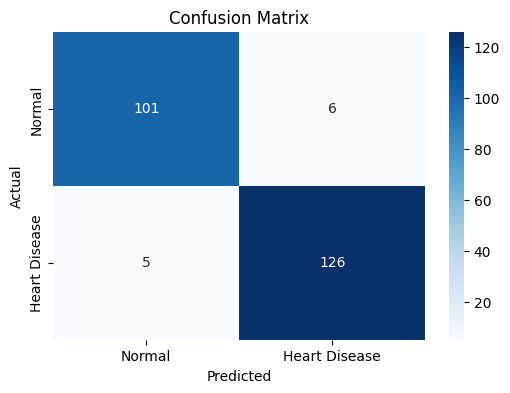

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


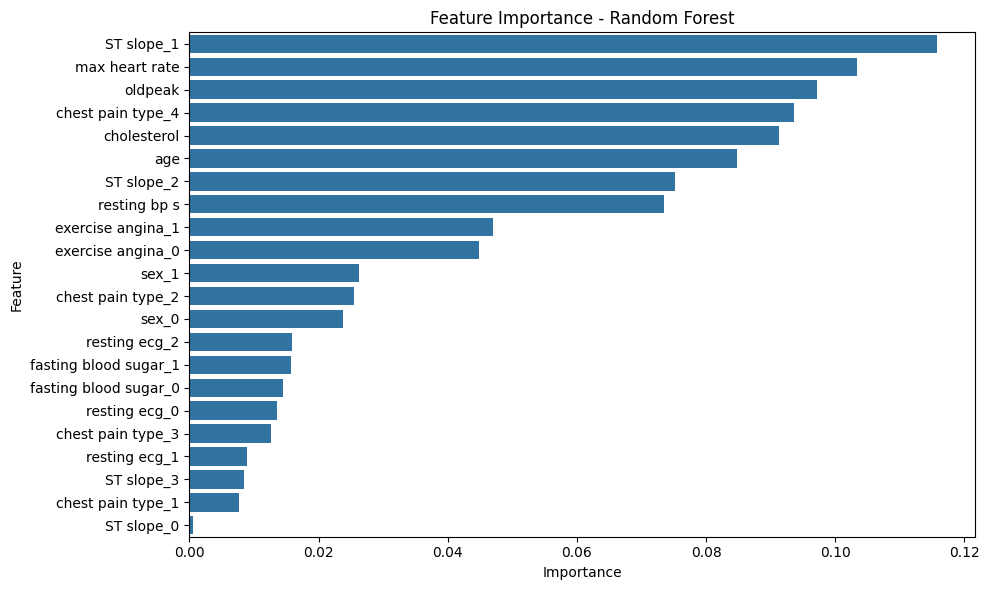

In [ ]:
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, encoded_feature_names])

importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
